In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#first load dataset
df=pd.read_csv("kaggle_diabetes.csv")
#to show first five records from dataset
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.shape

(2000, 9)

In [4]:
#here target variable is Outcome

In [5]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [6]:
#chcek the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

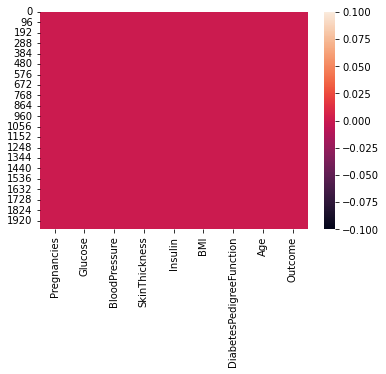

In [8]:
#visualize the null values 
sns.heatmap(df.isnull())
plt.show()

In [9]:
#here there are no null values

In [10]:
#chcek duplicate values
df.duplicated().sum()

1256

In [11]:
#drop the duplicated values
df.drop_duplicates(inplace=True)

In [12]:
#chcek duplicate values again
df.duplicated().sum()

0

In [13]:
#need to check data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
df.shape

(744, 9)

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
#Need to use classification as the Outcome has categorical data

In [16]:
#need to check if output is balance or not
df["Outcome"].value_counts()

0    491
1    253
Name: Outcome, dtype: int64

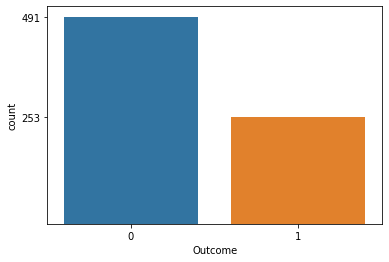

In [17]:
sns.countplot(data=df,x="Outcome")
f=df["Outcome"].value_counts()
plt.yticks(f)
plt.show()

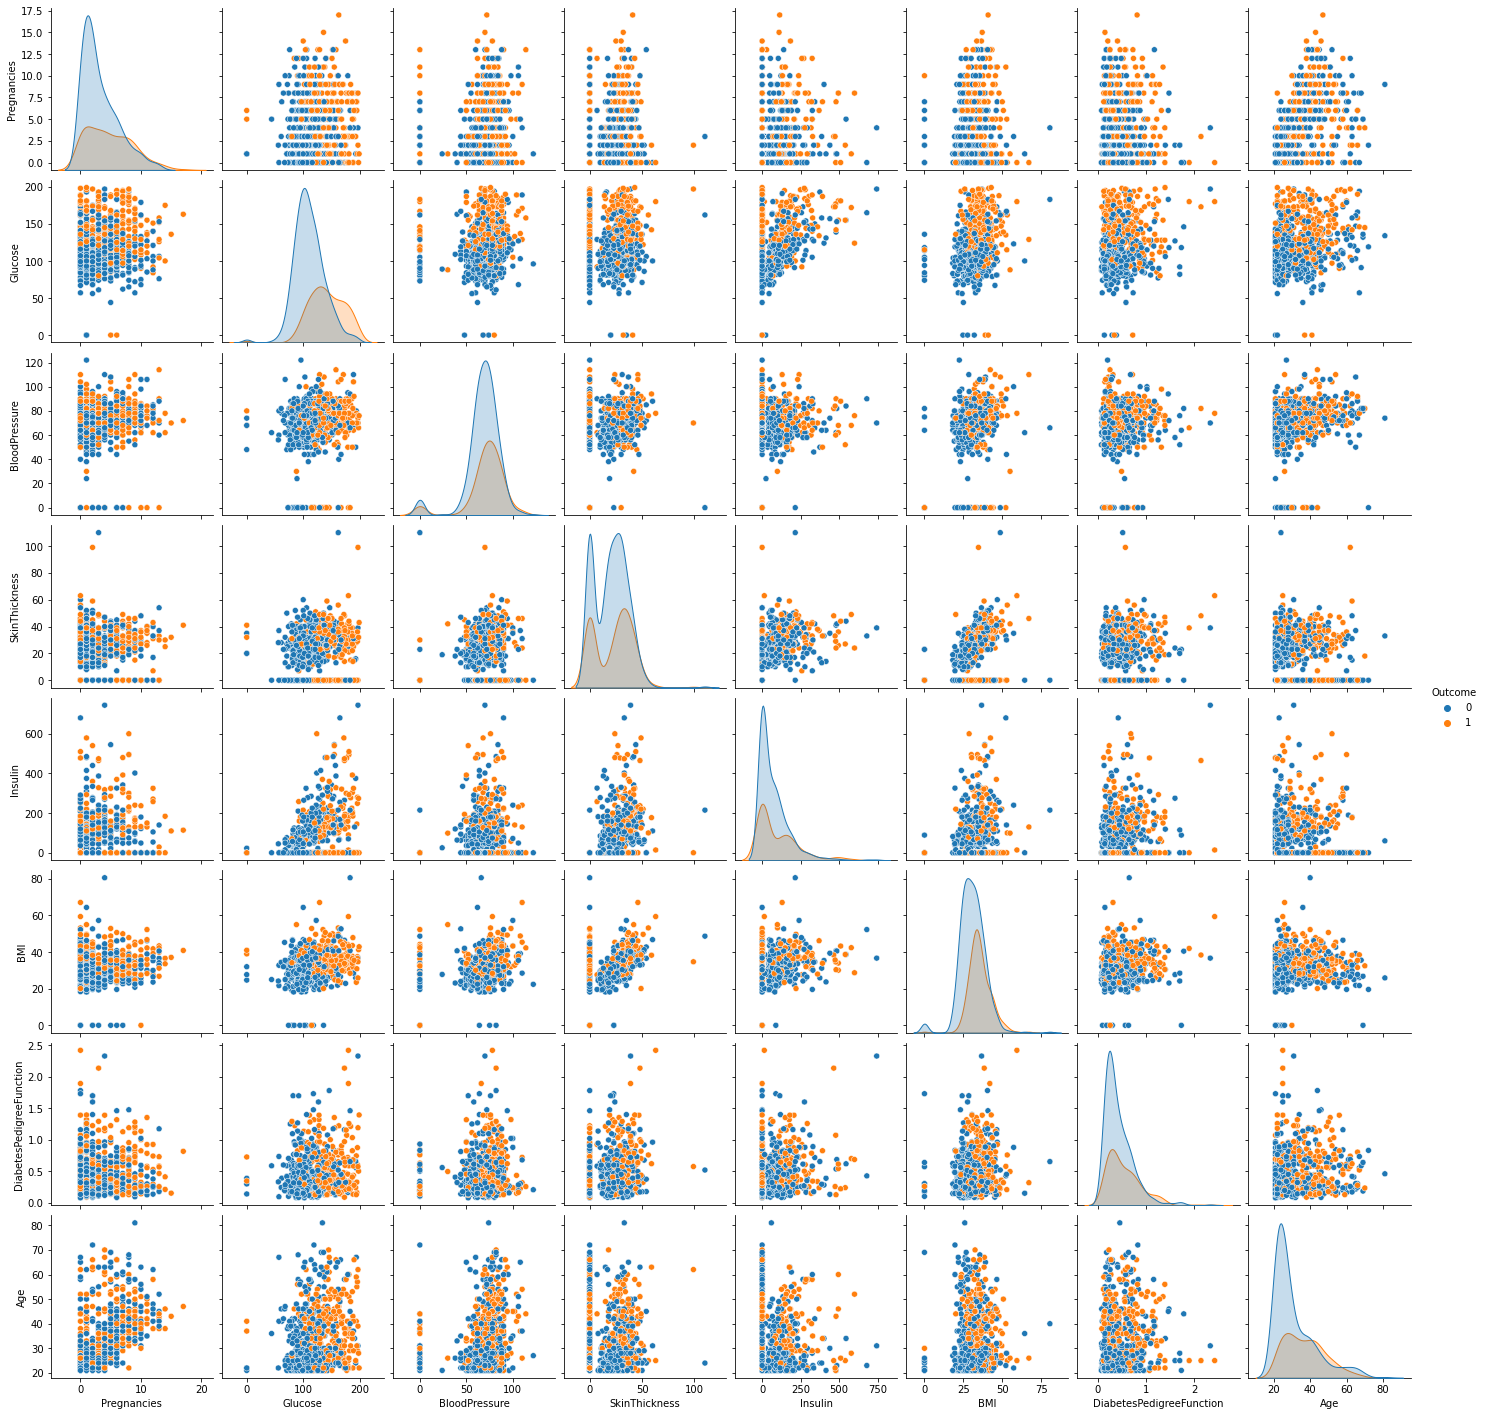

In [32]:
sns.pairplot(df,hue="Outcome")

In [33]:
#here data is balanced
#splitting input and output
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [34]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
# Applying standard scaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
# Create object of standard scaler class
ss= StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((520, 8), (224, 8), (520,), (224,))

In [37]:
#create a function 
def create_model(model):   #model user define which hold the object of algo.
    #train the model
    model.fit(x_train,y_train)
    #test the model with 30% data
    Y_pred=model.predict(x_test)
    #generate report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [38]:
#first going with logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
#create function
def create_model(model):
    #train the model with70% data
    model.fit(x_train,y_train)
    # test the model with 30% data
    y_pred=model.predict(x_test)
    #genrate the report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

#import libraries
from sklearn.metrics import classification_report,confusion_matrix

#call the function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

[[134  20]
 [ 28  42]]


In [40]:
#conclusion: here logistic regression gives you score of 1:0.60 and 0 is 0.87

In [41]:
#Applying decision tree algo for gini index
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method

In [42]:
#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       154
           1       0.42      0.51      0.46        70

    accuracy                           0.63       224
   macro avg       0.59      0.60      0.59       224
weighted avg       0.65      0.63      0.64       224

[[105  49]
 [ 34  36]]


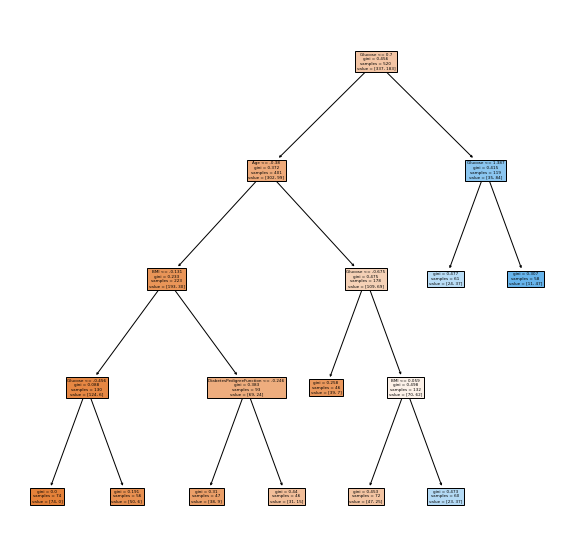

In [57]:
#Creating tree
# Inputs are in columns
features=x.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [58]:
#Checking important features
dt.feature_importances_

array([0.        , 0.56559613, 0.        , 0.        , 0.01980196,
       0.20982281, 0.06448554, 0.14029356])

In [59]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1

,Input,IG
0,Pregnancies,0.000000
1,Glucose,0.565596
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.019802
5,BMI,0.209823
6,DiabetesPedigreeFunction,0.064486
7,Age,0.140294


In [60]:
#arranging records descending
df9=df1.sort_values('IG',ascending=False,ignore_index=True)
df9

,Input,IG
0,Glucose,0.565596
1,BMI,0.209823
2,Age,0.140294
3,DiabetesPedigreeFunction,0.064486
4,Insulin,0.019802
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,SkinThickness,0.000000


In [61]:
#Using pruning technique for DTC using entropy

In [62]:
#1.Max Depth Parameter: max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''
dt=DecisionTreeClassifier(random_state=1,max_depth=4)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       154
           1       0.53      0.80      0.64        70

    accuracy                           0.71       224
   macro avg       0.70      0.74      0.70       224
weighted avg       0.77      0.71      0.72       224

[[104  50]
 [ 14  56]]


In [68]:
#2.Min Samples leaf
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples leaf:",i)
    #call the function 
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224

[[120  34]
 [ 22  48]]


In [69]:
#Conclusion: Decision Tree Gini Index
#Decision Tree with Gini Index: 0: 0.68, 1: 0.51
#Max Depth: 0: 0.68, 1: 0.80
#Min_samples_leaf: 0: 0.78, 1:0.69

In [70]:
#Applying Decision Tree using Entropy Index
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")
#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224

[[127  27]
 [ 32  38]]


In [71]:
#1.Max Depth Parameter: max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''
dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=4)
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       154
           1       0.54      0.79      0.64        70

    accuracy                           0.72       224
   macro avg       0.71      0.74      0.71       224
weighted avg       0.77      0.72      0.73       224

[[107  47]
 [ 15  55]]


In [74]:
#2.Min Samples leaf
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples leaf:",i)
    #call the function 
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224

[[120  34]
 [ 22  48]]


In [75]:
#Conclusion: Decision Tree Gini Index
#Decision Tree with Gini Index: 0: 0.82, 1: 0.54
#Max Depth: 0: 0.69, 1: 0.79
#Min_samples_leaf: 0: 0.78, 1:0.69

In [76]:
#checking features
x.shape

(744, 8)

In [85]:
#Random Forest Tree
'''
for i in range(8,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)
'''    
#call random forest tree from package use gini index
from sklearn.ensemble import RandomForestClassifier
#create a object of RandomForestClassifier class()
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       154
           1       0.65      0.60      0.62        70

    accuracy                           0.77       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

[[131  23]
 [ 28  42]]


In [90]:
#Random Forest using Entropy
'''
for i in range(8,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)
'''
rfc=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       154
           1       0.64      0.60      0.62        70

    accuracy                           0.77       224
   macro avg       0.73      0.72      0.73       224
weighted avg       0.76      0.77      0.77       224

[[130  24]
 [ 28  42]]


In [91]:
#Conclusion Random Forest
#Gini Index: 0: 0.85, 1: 0.60
#Entropy: 0: 0.84, 1:0.62

In [92]:
#Using Boosting Technique

In [97]:
#1. ADA Boosting Technique
from sklearn.ensemble import AdaBoostClassifier
'''
for i in range(1,9):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)
'''
#create the object AdaBoostClassifier class#by deafalut gini index
ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#call the function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       154
           1       0.63      0.56      0.59        70

    accuracy                           0.76       224
   macro avg       0.72      0.70      0.71       224
weighted avg       0.75      0.76      0.75       224

[[131  23]
 [ 31  39]]


In [98]:
#conclusion :#adaboosting  recall score :   1-0.56 and 0 - 0.85 on decision stump:5

In [101]:
#Gradient Boosting :
from sklearn.ensemble import GradientBoostingClassifier
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    gbc=create_model(gbc)
'''
#create the object GradientBoostClassifier class#by deafalut gini index
gbc=GradientBoostingClassifier(n_estimators=80,random_state=1)
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.64      0.64      0.64        70

    accuracy                           0.78       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.78      0.78      0.78       224

[[129  25]
 [ 25  45]]


In [102]:
#conclusion :#gradientboosting  recall score : 1- 0.64 and 0 - 0.84 on decision stump:80

In [103]:
#Extreme Gradient Boosting(XGB)
#call 
from xgboost import XGBClassifier

In [110]:
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("no of descision stump:",i)
    #call the function
    xgc=create_model(xgc)#11
'''
#create object for XGBClassifier class
xgc=XGBClassifier(n_estimators=11,reg_alpha=1,random_state=1)
#automatic overftting : reg means regualrization  and alpha or lambda:
#hyperpermater
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
xgc=create_model(xgc)


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.61      0.67      0.64        70

    accuracy                           0.76       224
   macro avg       0.73      0.74      0.73       224
weighted avg       0.77      0.76      0.77       224

[[124  30]
 [ 23  47]]


In [111]:
#conclusion :# extreme gradientboosting  recall score :   1-0.67 and 0 - 0.81 on decision stump:11

In [112]:
#applying SVM(Support Vector Machine)
#1. Linear Separable data means Linear Kernal
#call inbuilt class 
from sklearn.svm import LinearSVC

In [115]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

[[136  18]
 [ 30  40]]


In [117]:
#create object of LinearSVC class and add some external error 
svc1=LinearSVC(random_state=1,C=0.9) #soft margin

#here C is parameter which is used to add some error during training time 
#set range of error 0.001 to 1 means C<=1
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

[[136  18]
 [ 30  40]]


In [118]:
#data is not linear cause even after adding external errors nothing happened

In [119]:
#polynomial kernel function
#use ibuilt class SVC(support vector classifier)
from sklearn.svm import SVC

In [120]:
#create object for  SVC class and passing the poly in kernel parameter
svc1= SVC(random_state=1,kernel="poly")
#call function 
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       0.79      0.96      0.87       154
           1       0.83      0.43      0.57        70

    accuracy                           0.79       224
   macro avg       0.81      0.69      0.72       224
weighted avg       0.80      0.79      0.77       224

[[148   6]
 [ 40  30]]


In [121]:
#radial kernel function
#create object for  SVC class and passing the radial basis in kernel parameter
svc2= SVC(random_state=1,kernel="rbf")
#call function 
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

[[134  20]
 [ 28  42]]


In [ ]:
#Conclusion SVM 1. Kernel 0: 0.88,  1: 0.57
#2. Polynomial Kernel Function: 0: 0.96,  1: 0.53
#3. Radial Kernel Function: 0: 0.87,  1: 0.60

In [122]:
#KNN ALGORITHM
df9

,Input,IG
0,Glucose,0.565596
1,BMI,0.209823
2,Age,0.140294
3,DiabetesPedigreeFunction,0.064486
4,Insulin,0.019802
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,SkinThickness,0.000000


In [123]:
#select input and ouput
x=df[["Glucose","BMI","Age"]]
y=df["Outcome"]

In [124]:
# spliting the data of x and y using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [125]:
#first apply standardscaler
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [126]:
#give data to knn algorithm
from sklearn.neighbors import KNeighborsClassifier
#create object for KNeighboursClassifier class
knc=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)

In [127]:
#call function 
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       154
           1       0.59      0.64      0.62        70

    accuracy                           0.75       224
   macro avg       0.71      0.72      0.72       224
weighted avg       0.76      0.75      0.75       224

[[123  31]
 [ 25  45]]


In [1]:
#Conclusion knn algo 0: 0.80,  1: 0.64

In [ ]:
#Final Conclusion: The best technique is DecisionTreeClassifier using Entropy for Max Depth Parameter where score is
#  1: 0.80  &  0: 0.68 